In [14]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot
from scipy.stats import spearmanr

def main():
    data: DataFrame = pd.read_csv('data/Group18Data.csv')
    customPlot(data,'Thread Count')
    customPlot(data,'Elements')
    

def customPlot(data: DataFrame, across: str):

    threadCount: str = 'Thread Count'
    elements: str = 'Elements'
    algorithm: str = 'Algorithm'
    time: str = 'Time'

    if threadCount == across:
        data = data[data[elements] == max(data[elements])]
        X = data[[algorithm,threadCount,time]]
    else:
        data = data[data[threadCount] == max(data[threadCount])]
        X =data[[algorithm,elements,time]]
  
    
    customcmap = ["red", "blue", "green","grey","orange","purple"]
    
    
    fig, axis = plot.subplots(figsize=(8, 6))
    algorithmNames = np.unique(X[algorithm])

    for i in range(len(algorithmNames)):
        algoData = X[X[algorithm] == algorithmNames[i]].groupby(across).mean(numeric_only=True).reset_index()
        x = np.array(algoData[across])
        y = np.array(algoData[time])
        #Confidence interval stuff
        #ci = 0.915365* np.std(y)/np.sqrt(len(x))
        plot.plot(x, y,label=str(algorithmNames[i]), marker='o', color=customcmap[i])
        #confidence interval fill in b/w
        #plot.fill_between(x, (y-ci), (y+ci), color=customcmap[i], alpha=.1)
        #plot.plot(x, (y-ci),'--', color=customcmap[i])
        #plot.plot(x, (y+ci),'--', color=customcmap[i])
        
        #Spearman correlation
        if across == 'Thread Count':
            coef, p = spearmanr(x, y)
            print("Spearman correlation:", algorithmNames[i], coef)
        
        
        
        
    plot.legend(loc='best')
    axis.set_xlabel(across, fontsize=20)
    axis.set_ylabel(r'Time (s)', fontsize=20)
    plot.savefig('graphs/' + across +'.png')

Spearman correlation: Bitonic Sort -0.9878787878787878
Spearman correlation: MergeSort -0.9636363636363635
Spearman correlation: QuickSort 0.2606060606060606
Spearman correlation: Sample Sort 0.16363636363636364
Spearman correlation: TimSort -0.6969696969696969


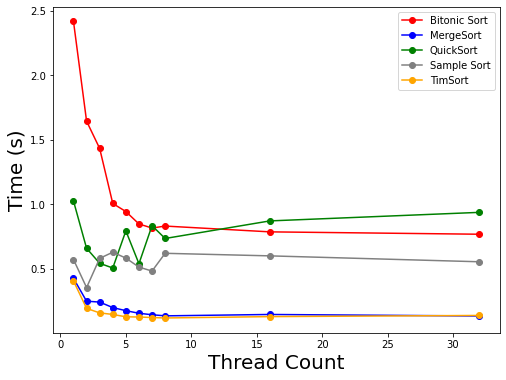

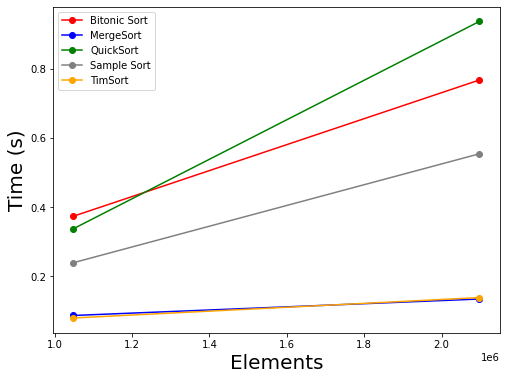

In [15]:
main()